In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
data = load_breast_cancer()
x = data.data  # 입력 데이터
y = data.target  # 타겟 (0: 악성, 1: 양성)

In [17]:
print(data.DESCR)  # 데이터셋에 대한 설명 확인
df = pd.DataFrame(data.data, columns=data.feature_names)

df['target'] = data.target  # 타겟 열 추가
print("\n데이터 샘플:\n", df.head())

#분포 확인
print("\n클래스 분포:\n", df['target'].value_counts())
#통계 요약 확인
print("\n데이터 통계 요약:\n", df.describe())

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [20]:
# 학습 데이터랑 샘플 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify=y)


# 학습 데이터로 모델 학습
model = LogisticRegression(max_iter = 10000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [23]:
# 테스트 데이터로 예측해보기
y_pred = model.predict(x_test)

# Logistic Regression은 Classification이기 때문에 정확도 평가 가능
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 약 95프로의 정확드를 보임.

Accuracy: 0.9473684210526315

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93        64
           1       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



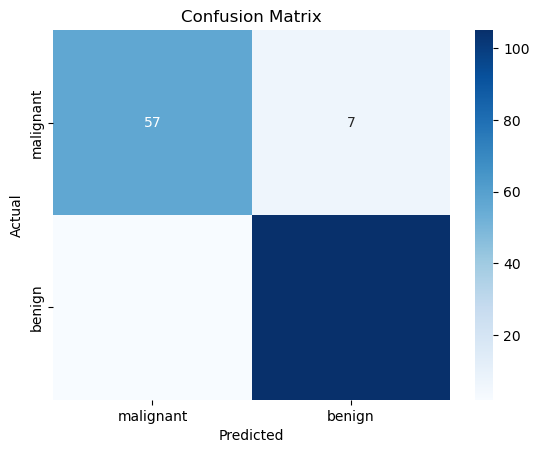

In [24]:
# 혼동 행렬로 모델이 잘못 분류한 샘플 수 확인
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

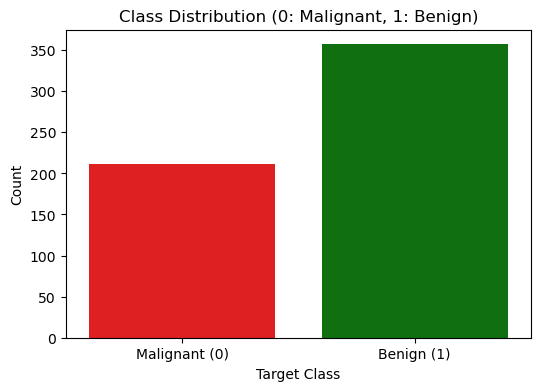

In [28]:
# 클래스 분포 시각화
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette=['red', 'green'])
plt.title('Class Distribution (0: Malignant, 1: Benign)')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Malignant (0)', 'Benign (1)'])
plt.show()

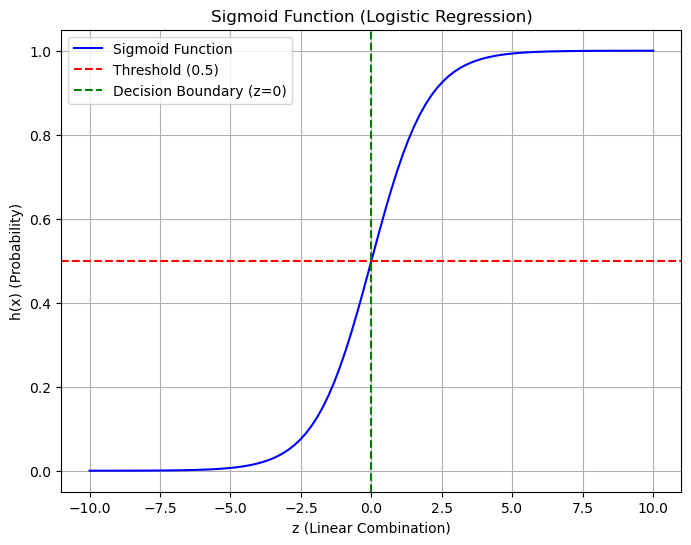

In [30]:
# 시그모이드 함수 정의
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# z 값 범위 설정
z = np.linspace(-10, 10, 100)  # -10에서 10까지 100개 점
h = sigmoid(z)

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(z, h, label='Sigmoid Function', color='blue')
plt.axhline(0.5, color='red', linestyle='--', label='Threshold (0.5)')
plt.axvline(0, color='green', linestyle='--', label='Decision Boundary (z=0)')
plt.title('Sigmoid Function (Logistic Regression)')
plt.xlabel('z (Linear Combination)')
plt.ylabel('h(x) (Probability)')
plt.legend()
plt.grid()
plt.show()